In [1]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

plt.rcParams["savefig.bbox"] = 'tight'

<function matplotlib.pyplot.show(close=None, block=None)>

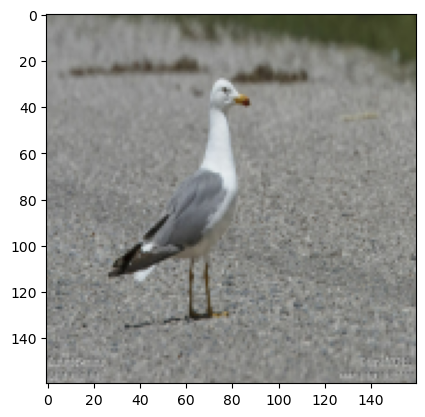

In [2]:
# Viewing a sample image 
image_path = r"C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\dataset\train\gull\armeniangull_4.jpeg"
image = cv2.imread(image_path, 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resizing an image
image = cv2.resize(image, (160, 160), interpolation = cv2.INTER_AREA)

plt.imshow(image)
plt.show

In [3]:
import os
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image

torch.manual_seed(0)

In [4]:
training_dataset_path = r'C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\dataset\train'

training_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

train_dataset = torchvision.datasets.ImageFolder(root = training_dataset_path, transform = training_transforms)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=32, shuffle=False)

In [5]:
def get_mean_and_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images, _ in loader:
        image_count_in_a_batch = images.size(0)
        images = images.view(image_count_in_a_batch, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images_count += image_count_in_a_batch
    
    mean /= total_images_count
    std /= total_images_count
    
    return mean, std


train_mean, train_std = get_mean_and_std(train_loader)
print(train_mean, train_std)

tensor([0.5024, 0.4874, 0.4400]) tensor([0.2017, 0.1925, 0.1931])


In [6]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(160,160)),
    transforms.ColorJitter(brightness=(0.8,1.5), contrast = 0.25 ,saturation = 0.25, hue=0.25),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.2),
    transforms.ToTensor(),
#     transforms.Normalize(mean=train_mean, std=train_std)
])

val_transforms = transforms.Compose([
    transforms.Resize(size=(160,160)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.2),
    transforms.ToTensor(),
#     transforms.Normalize(mean=train_mean, std=train_std)
])

In [7]:
validation_dataset_path = r'C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\dataset\val'

validation_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

val_dataset = torchvision.datasets.ImageFolder(root = validation_dataset_path, transform = validation_transforms)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset, batch_size=32, shuffle=False)

labels:  tensor([3, 2, 3, 0, 2, 4])


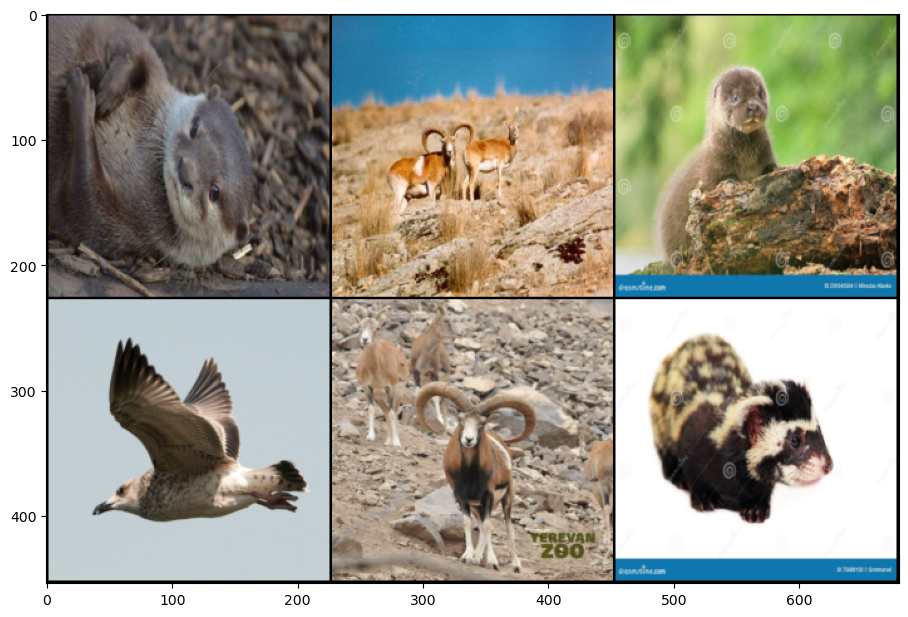

In [8]:
def show_transformed_images(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size = 6, shuffle=True)
    batch = next(iter(loader))
    images, labels = batch
    
    grid = torchvision.utils.make_grid(images, nrow = 3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print('labels: ', labels)

show_transformed_images(train_dataset)

labels:  tensor([2, 4, 0, 4, 1, 3])


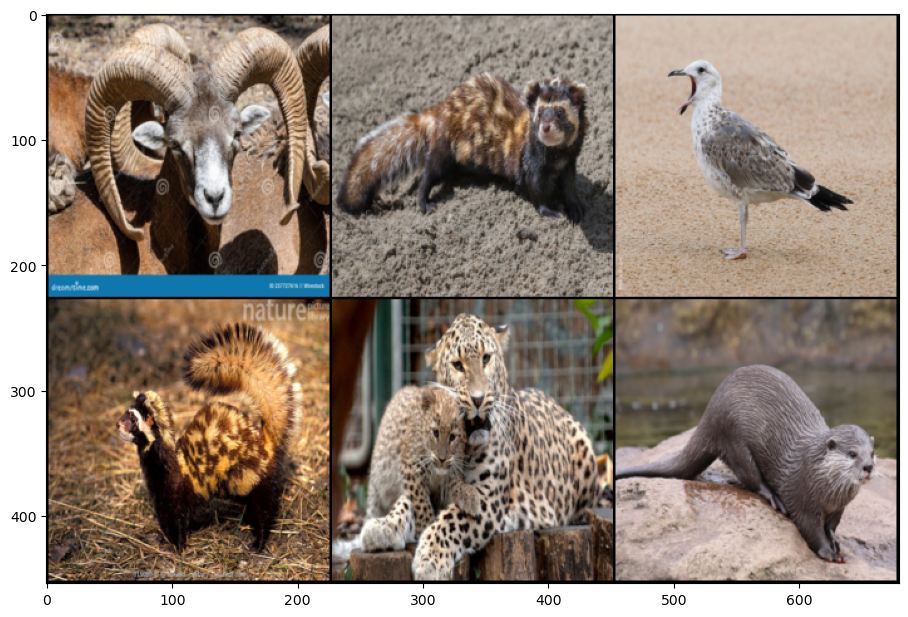

In [9]:
show_transformed_images(val_dataset)

In [10]:
root_dir_name = r'C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\augmented'
os.mkdir(f'{root_dir_name}')
os.mkdir(f'{root_dir_name}/train')
os.mkdir(f'{root_dir_name}/train/gull')
os.mkdir(f'{root_dir_name}/train/mouflon')
os.mkdir(f'{root_dir_name}/train/leopard')
os.mkdir(f'{root_dir_name}/train/otter')
os.mkdir(f'{root_dir_name}/train/polecat')
os.mkdir(f'{root_dir_name}/val')
os.mkdir(f'{root_dir_name}/val/gull')
os.mkdir(f'{root_dir_name}/val/mouflon')
os.mkdir(f'{root_dir_name}/val/leopard')
os.mkdir(f'{root_dir_name}/val/otter')
os.mkdir(f'{root_dir_name}/val/polecat')

In [11]:
index_mouflon = 0
index_gull = 0
index_leopard = 0
for _ in range(10):
    for img, label in train_dataset:
        if label == 0:
            save_image(img, f'{root_dir_name}/train/mouflon/mouflon_{index_mouflon}.jpg')
            index_mouflon += 1
        elif label == 1:
            save_image(img, f'{root_dir_name}/train/gull/gull_{index_gull}.jpg')
            index_gull += 1
        elif label == 2:
            save_image(img, f'{root_dir_name}/train/leopard/leopard_{index_leopard}.jpg')
            index_leopard += 1
        elif label == 3:
            save_image(img, f'{root_dir_name}/train/otter/otter_{index_leopard}.jpg')
            index_leopard += 1
        elif label == 4:
            save_image(img, f'{root_dir_name}/train/polecat/polecat_{index_leopard}.jpg')
            index_leopard += 1

In [12]:
index_mouflon = 0
index_gull = 0
index_leopard = 0
for _ in range(10):
    for img, label in val_dataset:
        if label == 0:
            save_image(img, f'{root_dir_name}/val/mouflon/mouflon_{index_mouflon}.jpg')
            index_mouflon += 1
        elif label == 1:
            save_image(img, f'{root_dir_name}/val/gull/gull_{index_gull}.jpg')
            index_gull += 1
        elif label == 2:
            save_image(img, f'{root_dir_name}/val/leopard/leopard_{index_leopard}.jpg')
            index_leopard += 1
        elif label == 3:
            save_image(img, f'{root_dir_name}/val/otter/otter_{index_leopard}.jpg')
            index_leopard += 1
        elif label == 4:
            save_image(img, f'{root_dir_name}/val/polecat/polecat_{index_leopard}.jpg')
            index_leopard += 1

In [13]:
# ! pip install ultralytics==8.0.58

In [14]:
import pandas as pd
from ultralytics import YOLO

In [15]:
model = YOLO('yolov8x-cls.pt')

In [16]:
results = model.train(data=r'C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\dataset', epochs=5, imgsz=160)

New https://pypi.org/project/ultralytics/8.1.37 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.36 🚀 Python-3.12.2 torch-2.2.1 CPU (Intel Core(TM) i7-7500U 2.70GHz)
engine\trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\dataset, epochs=5, time=None, patience=100, batch=16, imgsz=160, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma

train: Scanning C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\dataset\train... 160 images, 0 corrupt: 100%|███████

train: New cache created: C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\dataset\train.cache



val: Scanning C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\dataset\val... 48 images, 0 corrupt: 100%|██████████| 

val: New cache created: C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\dataset\val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 0 dataloader workers
Logging results to runs\classify\train23
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.57s/it]

                   all      0.438          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.63s/it]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.61s/it]

                   all      0.958          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.58s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.52s/it]

                   all          1          1



5 epochs completed in 0.110 hours.
Optimizer stripped from runs\classify\train23\weights\last.pt, 112.5MB
Optimizer stripped from runs\classify\train23\weights\best.pt, 112.5MB

Validating runs\classify\train23\weights\best.pt...
Ultralytics YOLOv8.1.36 🚀 Python-3.12.2 torch-2.2.1 CPU (Intel Core(TM) i7-7500U 2.70GHz)
YOLOv8x-cls summary (fused): 133 layers, 56129605 parameters, 0 gradients, 153.8 GFLOPs
train: C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\dataset\train... found 160 images in 5 classes ✅ 
val: C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\dataset\val... found 48 images in 5 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:06<00:00,  3.21s/it]


                   all          1          1
Speed: 0.0ms preprocess, 112.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train23
Results saved to runs\classify\train23


In [ ]:
results = model.val()

In [ ]:
# results_path = './results.csv'

# results = pd.read_csv(results_path)

# plt.figure()
# plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
# plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
# plt.grid()
# plt.title('Losses')
# plt.ylabel('loss')
# plt.xlabel('epochs')
# plt.legend()


# plt.figure()
# plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
# plt.grid()
# plt.title('Validation accuracy')
# plt.ylabel('accuracy (%)')
# plt.xlabel('epochs')

# plt.show()

In [ ]:
test_dataset_path = 'C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\test'

test_transforms = transforms.Compose([
    transforms.Resize(size=(160,160)),
    transforms.ToTensor(),
#     transforms.Normalize(mean=train_mean, std=train_std)
])

test_dataset = torchvision.datasets.ImageFolder(root=test_dataset_path, transform=test_transforms)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)
show_transformed_images(test_dataset)

In [ ]:
test_dataset_path = 'C:\Users\egs-admin\Desktop\ArmenianAnimals\animals\test'

test_transforms = transforms.Compose([
    transforms.Resize(size=(160,160)),
    transforms.ToTensor(),
#     transforms.Normalize(mean=train_mean, std=train_std)
])

test_dataset = torchvision.datasets.ImageFolder(root=test_dataset_path, transform=test_transforms)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)
show_transformed_images(test_dataset)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

# Load the model
model = YOLO('./yolov8x_cls_custom.pt')

y_true = []
y_pred = []

# Run inference and print predictions
for imgs, label in test_loader:
    
    results = model(imgs, verbose=False)
    cls_names = results[0].names
    probabilities = results[0].probs.tolist()
    
    y_true.append(label.item())
    y_pred.append(np.argmax(results[0].probs.tolist()))
    
    print(
            "label:", f'{cls_names[label.item()]:6}',
        
            ",  prediction:", f'{cls_names[np.argmax(results[0].probs.tolist())]:6}',
        
            ",  confidence:", round(max(probabilities),3)
         )

In [ ]:
print('F1-score:', f1_score(y_trues, y_preds))
print('Accuracy:', accuracy_score(y_trues, y_preds))